# Imported Library

Please import all necessary library that will be needed in this kernel here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# Imported Dataset

Please import your dataset in pandas dataframe form. You can find the dataset in '../data/' directory. Don't forget to display the 5 top and size of dataset to give us initial idea about what kind dataset that we're going to analyze.

In [2]:
data_train = pd.read_csv('dataPreprocessed/regression_train.csv')
data_train.head()

,carat,depth,table,x,y,z,cut_new,color_new,clarity_new,price
0,0.843575,0.425926,0.438596,0.892617,0.876380,0.906849,2,3,4,17204
1,0.184358,0.611111,0.263158,0.331096,0.331126,0.501370,2,3,2,1329
2,0.743017,0.777778,0.526316,0.789709,0.801325,0.876712,4,5,2,7971
3,0.290503,0.648148,0.701754,0.440716,0.434879,0.586301,3,3,3,2115
4,0.581006,0.462963,0.614035,0.718121,0.708609,0.780822,3,2,2,7162


In [4]:
data_test = pd.read_csv('dataPreprocessed/regression_test.csv')
data_test.head()

,carat,depth,table,x,y,z,cut_new,color_new,clarity_new,price
0,0.452514,0.296296,0.614035,0.595078,0.604857,0.679452,3,6,0,2488
1,0.055866,0.055556,0.701754,0.145414,0.145695,0.323288,3,0,4,848
2,0.094972,0.851852,0.263158,0.192394,0.192053,0.410959,1,0,2,874
3,0.290503,0.537037,0.263158,0.449664,0.461369,0.591781,2,4,6,2958
4,0.122905,0.444444,0.175439,0.248322,0.245033,0.424658,2,0,4,1235


# Modelling Phase

## Training Phase & Testing Phase

In [5]:
data_train.corr()['price']

carat          0.906797
depth         -0.006466
table          0.118837
x              0.874065
y              0.875339
z              0.870637
cut_new        0.045729
color_new      0.091373
clarity_new   -0.023252
price          1.000000
Name: price, dtype: float64

### One Variable

In [6]:
X_train_one = data_train[['carat']]
y_train_one = data_train['price']

X_test_one = data_test[['carat']]
y_test_one = data_test['price']

In [7]:
clf_one = LinearRegression()

In [8]:
clf_one.fit(X_train_one, y_train_one)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
pred_one = clf_one.predict(X_test_one)

In [16]:
pd.DataFrame({'Actual':y_test_one,
             'Predict':pred_one}).head()

,Actual,Predict
0,2488,5606.419623
1,848,102.750538
2,874,645.365800
3,2958,3358.442109
4,1235,1032.948130


### Some Variable

In [9]:
X_train_some = data_train[['carat','x','y','z']]
y_train_some = data_train['price']

X_test_some = data_test[['carat','x','y','z']]
y_test_some = data_test['price']

In [10]:
clf_some = LinearRegression()

In [11]:
clf_some.fit(X_train_some, y_train_some)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
pred_some = clf_some.predict(X_test_some)

In [18]:
pd.DataFrame({'Actual':y_test_some,
             'Predict':pred_some}).head()

,Actual,Predict
0,2488,5641.942482
1,848,684.721320
2,874,521.654886
3,2958,2872.532703
4,1235,894.372673


### All Variable

In [12]:
X_train_all = data_train.drop('price', axis = 1)
y_train_all = data_train['price']

X_test_all = data_test.drop('price', axis = 1)
y_test_all = data_test['price']

In [13]:
clf_all = LinearRegression()

In [14]:
clf_all.fit(X_train_all, y_train_all)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
pred_all = clf_all.predict(X_test_all)

In [20]:
pd.DataFrame({'Actual':y_test_all,
             'Predict':pred_all}).head()

,Actual,Predict
0,2488,3700.933721
1,848,1070.653007
2,874,720.344433
3,2958,3177.751027
4,1235,1792.199878


## Optimization Phase

In [ ]:
# Machine learning model 1 optimization phase

In [ ]:
# And keep on...

## Ensamble Phase (optional)

<hr>

# Evaluation

From data modeling that has been done, please state your evaluation/conclusion related to:

1. Our dataset behaviour (how our prediction characteristic & trend)
2. Model Analysis, including their parameter & performance
3. Result after optimization phase
4. Relate your analysis with EDA & preprocessing that you have done before
5. Another improvement that must be done to increase your model performance

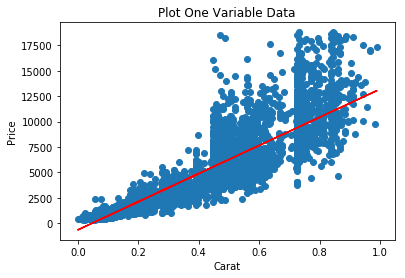

In [22]:
# Dataset behaviour for One Variable

plt.scatter(X_test_one, y_test_one)
plt.plot(X_test_one, pred_one, c='r')
plt.title('Plot One Variable Data')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [31]:
# Model analysis
def modelAnlaysis(test, pred, name):
    print(name,'Variable Linear Regression')
    print('MSE = %1.3f'%mean_squared_error(test, pred))
    print('MAE = %1.3f'%mean_absolute_error(test, pred))
    print('R2_Score = %1.3f'%r2_score(test, pred))
    print('')

In [32]:
modelAnlaysis(y_test_one, pred_one, 'One')
modelAnlaysis(y_test_some, pred_some, 'Some')
modelAnlaysis(y_test_all, pred_all, 'All')

One Variable Linear Regression
MSE = 1996803.367
MAE = 919.541
R2_Score = 0.824

Some Variable Linear Regression
MSE = 1773265.988
MAE = 777.164
R2_Score = 0.843

All Variable Linear Regression
MSE = 1391142.724
MAE = 759.750
R2_Score = 0.877



### Result after optimization phase

Tidak ada optimasi dan crossVal pada Linear Regression

### EDA & preprocessing relation analysis

Proses ini membut hasil prediksi cukup bagus, karena saya sebelumnya mengasilkan score sekitar 0.85. Hal ini disebabkan karena proses ini menghilangkan beberapa outlier, meskipun terdapat outlier pada data setelah diproses walau sedikit

In [34]:
# Another improvement
improv = r2_score(y_test_all, pred_all) - r2_score(y_test_one, pred_one)
print('Peningkatan dari score One Variable ke All Variable sebesar : ', improv)

Peningkatan dari score One Variable ke All Variable sebesar :  0.05351002778391345
